<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Lab 2: Exploratory Data Analysis</center><center><font color='red'>Deadline: February 11, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this lab must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools.
- If you encounter error messages similar to [<font color='brown'>ModuleNotFoundError: </font>No module named 'numpy'], make sure that you've installed the required libraries (refer to instructions in lab 0 for more details).

## Supplementary Materials
We have added links to tutotials for the packages that are used in this lab on Canvas under Modules → Supplementary Materials. This module will be gradually updated throughout the semester. 

## Submission
You need to submit a single .ipynb file on Canvas, names your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 18 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

****

In this lab, we'll explore a very useful dataset from the National Center for Health Statistics [https://www.cdc.gov/nchs/index.htm]. The dataset is from the National 2009 H1N1 Flu Survey (NHFS).

Download the dataset (training_set_features.csv) from Canvas and save it in the same directory as this Jupyter Notebook. All details of the dataset can be found in the accompanying Readme file. 

Now, 
<b>Question 1)</b> Read the dataset using Python's csv module and create a variable 'h1n1_seasonal_flu_dataset' which is a list of rows from the dataset. Each row should be a list of of string values returned by the csv file reader. <b>[2 Points]</b>

<b>Question 2)</b> How many rows does the dataset have? Print the 10th line of the dataset. <b>[2 Point]</b>

In [1]:
import csv
# Add your code here

with open('training_set_features.csv') as data_file:
    # read in file, and compose list of rows from the dataset using csv reader (Q1)
    h1n1_seasonal_flu_dataset = list(csv.reader(data_file))
    
print(f'The dataset contains {len(h1n1_seasonal_flu_dataset)} rows')
# 0 base indexing, so 10th line is [9] (Q2)
print(f'10th line of dataset : {h1n1_seasonal_flu_dataset[9]}')

The dataset contains 26707 rows
10th line of dataset : ['9', '2', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '4', '2', '2', '4', '2', '2', '55 - 64 Years', '12 Years', 'White', 'Male', '<= $75,000, Above Poverty', 'Not Married', 'Own', 'Not in Labor Force', 'qufhixun', 'MSA, Not Principle  City', '0', '0', '', '']


## Data Cleaning

First we have to clean and sanitize the dataset. This dataset is a mixture of numeric and categorical features but contains some '' in some fields to indicate missing values.

<b>Question 3)</b> To make it easier to handle, we convert those fields to 'None'. For convenience, you should define a function "replaceEmpty" that takes a string argument, and returns None if the argument is '', otherwise the value of the string. <b>[2 Points]

In [2]:
def replaceEmpty(x):
    # Complete this function
    if x == '':
        # if empty return None, they aren't actually '' in these fields, just missing completely
        return None
    else:
        # othewrise just return the value of the string
        return x

In [3]:
h1n1_seasonal_flu_dataset = [[replaceEmpty(x) for x in y] for y in h1n1_seasonal_flu_dataset]
h1n1_seasonal_flu_dataset[10]

['10',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '4',
 '1',
 '2',
 '5',
 '4',
 '4',
 '45 - 54 Years',
 '12 Years',
 'White',
 'Male',
 '<= $75,000, Above Poverty',
 'Married',
 'Rent',
 'Employed',
 'lzgpxyit',
 'MSA, Not Principle  City',
 '2',
 '0',
 'xicduogh',
 'qxajmpny']

In the dataset summary, the following are the column names: 

In [4]:
headers = ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
           'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
           'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
           'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
           'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
           'age', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 
           'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 
           'employment_occupation'
]
print(headers)

['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']


Now, <b>Question 4)</b> Construct a dictionary mapping these header names to the column numbers 0...36. <b>[2 Points]

In [5]:
# Maps header names above to appropriate column numbers
# need an empty dict
map_headers_to_columns = {}
# set the column index value to 0
column_index = 0
# iterate through the list elements (the headers provided)
for header in headers:
    # at the header, set a column index value for that header
    map_headers_to_columns[header] = column_index
    # increment column index value until each title is mapped to its corresponding column
    column_index += 1
print(map_headers_to_columns)

{'respondent_id': 0, 'h1n1_concern': 1, 'h1n1_knowledge': 2, 'behavioral_antiviral_meds': 3, 'behavioral_avoidance': 4, 'behavioral_face_mask': 5, 'behavioral_wash_hands': 6, 'behavioral_large_gatherings': 7, 'behavioral_outside_home': 8, 'behavioral_touch_face': 9, 'doctor_recc_h1n1': 10, 'doctor_recc_seasonal': 11, 'chronic_med_condition': 12, 'child_under_6_months': 13, 'health_worker': 14, 'health_insurance': 15, 'opinion_h1n1_vacc_effective': 16, 'opinion_h1n1_risk': 17, 'opinion_h1n1_sick_from_vacc': 18, 'opinion_seas_vacc_effective': 19, 'opinion_seas_risk': 20, 'opinion_seas_sick_from_vacc': 21, 'age': 22, 'education': 23, 'race': 24, 'sex': 25, 'income_poverty': 26, 'marital_status': 27, 'rent_or_own': 28, 'employment_status': 29, 'hhs_geo_region': 30, 'census_msa': 31, 'household_adults': 32, 'household_children': 33, 'employment_industry': 34, 'employment_occupation': 35}


<b>Question 5)</b> Define the function "getColumn" below that takes a column name and returns the data in that column as a list of strings. <b>[2 Points]</b>

In [6]:
def getColumn(name): 
    # Complete this funtion
    # Need a list to return the data fround in a column from the dataset, given a name as param
    list_of_data_from_column_name = []
    # for the column data in the dataset
    for column_data in h1n1_seasonal_flu_dataset:
        # append to our list, the specific column data, using our map as the specific key (the name of the column)
        list_of_data_from_column_name.append(column_data[map_headers_to_columns[name]])
    return list_of_data_from_column_name

In [7]:
print(getColumn('doctor_recc_h1n1'))
# tested with respondent_id for clarity
# print(getColumn('respondent_id'))

['0', '0', None, '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', None, '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', None, '0', '0', '0', None, '1', '1', None, '0', '0', '1', '1', None, '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', None, '0', '0', '0', None, '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', None, '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', None, '0', '0', '0', None, '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0'

## Missing Data

Identifying and treating features with missing values is very important since the data insights or the predictive model's performance could be severely impacted if the missing values were not appropriately handled. There are different strategies for dealing with missing values. The most obvious and often harmful, depending on the amount of missing data, would be deleting all the dataset entries with missing values. Others include deleting features with missing values and imputation, which is the process of substituting the missing data by some statistical methods. Imputation is useful because it preserves all cases by replacing missing data with an estimated value based on other available information. However, it should be used carefully as it often introduces a large amount of bias and reduces variance in the dataset.

<b>Question 6)</b> For the following columns ['household_adults', 'household_children', 'opinion_h1n1_risk', 'h1n1_knowledge'], replace the missing values 'None' with the average value for that column. <b>[10 Points]

In [8]:
# Add your code here\

# created columns of desired name
hh_adults_col = getColumn('household_adults')
hh_children_col = getColumn('household_children')
opinion_h_risk = getColumn('opinion_h1n1_risk')
h_knowledge = getColumn('h1n1_knowledge')

def replace_none_to_avg_value(column_passed):
    """args: column_name, a str to pass the 4 columns mentioned above
       returns: altered columns with avg of column in place of 'None' values
       Note: all averages replacing NoneType are rounded to 2 decimal digits"""
    resulting_list = []
    summation = 0
    length = len(column_passed)
    # we need to check for each cell thats a  None
    for value in column_passed:
        if value is None:
            # if it's a None type skip for now
            pass
        else:
            # it's a value, let's total all the values/divide by len(the_column)
            # to find the average column_value
            summation += int(value)
    mean = (summation / length)
    rounded_mean = round(mean, 2)
    resulting_list = [rounded_mean if v is None else v for v in column_passed]
            
    return resulting_list


# To verify your work.  The following checks should yield False:
print(None in replace_none_to_avg_value(hh_adults_col))
print(None in replace_none_to_avg_value(hh_children_col))
print(None in replace_none_to_avg_value(opinion_h_risk))
print(None in replace_none_to_avg_value(h_knowledge))

False
False
False
False


## Basic Statistics

<b>Question 7)</b> Replace the age groups in the 'age' column with random integer values as follows: the 'age' column defines the age group of the survey respondents and can take one of the two formats: 1) X - Y Years or 2) X+ Years. In the 'age' column, replace the first format with a random integer between X and Y and the second format with a random integer between X and 100. [<b>Hint:</b> use regular expressions to extract the ranges]. <b>[20 Points]</b>

In [9]:
# Add your code here
import re
import random as rand
        
# for row_index, row in enumerate(h1n1_seasonal_flu_dataset):
#     for col_index, col_val in enumerate(row):
#         if col_index == column_index:
#             age_group_val = col_val
#             pattern1 = re.compile(r'([0-9][0-9])\s-\s([0-9][0-9])\sYears')   # the pattern, tested and works
#             matches = re.findall(pattern1, ages)  # find all the occurences in age column
#             for (x_value, y_value) in matches:    # iterate through the matches, separating the groups (X) and (Y)
#                 x_ = int(x_value)                 # convert to int, randint() requires int
#                 y_ = int(y_value)                 # convert to int, randint() requires int
#                 age = str(rand.randint(x_, y_))  # store the random_value found between X - Y in random_value
#                 h1n1_seasonal_flu_dataset[row_index][column_index] = age

ages = str(getColumn('age'))  # expects str or byte obj's so converting to str

for row_index, row in enumerate(h1n1_seasonal_flu_dataset):
    # for every row and index in the dataset
    for col_index, col_val in enumerate(row):
        # for every column and value in each row
        if col_index == column_index:
            age_group_val = col_val
            x = re.search(r'(\d+) - (\d+)', age_group_val)
            if x:
                # we have a match
                age = rand.randint(int(x.group(1)), int(x.group(2)))
            else:
                # no match, check for 2nd pattern
                x = re.search(r'(\d+)\+', age_group_val)
                if x:
                    age = rand.randint(int(x.group(1)), 100)
                    
            h1n1_seasonal_flu_dataset[row_index][col_index] = age
            
h1n1_seasonal_flu_dataset[0:10]

[['0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '3',
  '1',
  '2',
  '2',
  '1',
  '2',
  '55 - 64 Years',
  '< 12 Years',
  'White',
  'Female',
  'Below Poverty',
  'Not Married',
  'Own',
  'Not in Labor Force',
  'oxchjgsf',
  'Non-MSA',
  '0',
  '0',
  None,
  None],
 ['1',
  '3',
  '2',
  '0',
  '1',
  '0',
  '1',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '5',
  '4',
  '4',
  '4',
  '2',
  '4',
  '35 - 44 Years',
  '12 Years',
  'White',
  'Male',
  'Below Poverty',
  'Not Married',
  'Rent',
  'Employed',
  'bhuqouqj',
  'MSA, Not Principle  City',
  '0',
  '0',
  'pxcmvdjn',
  'xgwztkwe'],
 ['2',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  None,
  None,
  '1',
  '0',
  '0',
  None,
  '3',
  '1',
  '1',
  '4',
  '1',
  '2',
  '18 - 34 Years',
  'College Graduate',
  'White',
  'Male',
  '<= $75,000, Above Poverty',
  'Not Married',
  'Own',
  'Employed',
  'qufhixun',
  

<b>Question 8)</b> Find the Minimum, Maximum, Mean, and Standard Deviation of the 'age' column. [<b>Hint</b>: use the numpy package]. <b>[4 Points]</b>

In [10]:
import numpy as np
# Add your code here
age = getColumn('age')
stats = [min(age), max(age), np.mean(age), np.std(age)]
print(stats)

TypeError: cannot perform reduce with flexible type

<b>Question 9)</b> Next, define a function named "select" which given a column name and a predicate, returns the values of that column at rows for which the predicate is true. Each predicate is a tuple of two elemetns, where the first element is the column name, and the second element is the filter value. For example, select('age', ('sex', 'Female')), returns the age of subjects with sex=Female. <b>[5 Points]</b> 

In [ ]:
def select(columnName, predicate):
    # Complete this function

In [ ]:
print(select('age', ('sex', 'Male'))) # Returns the age of 'Male' subjects

<b>Question 10)</b> Use the numpy package and the select function (defined above) and display the mean age of 'Male' and 'Female' subjects. <b>[10 Points]</b>

In [ ]:
# Add your code here
male_age =
female_age =


print(f'Average Male age={male_age}\nAverage Female age={female_age}')

## Histograms of Data Fields

<b>Question 11)</b> Plot the histograms of the 'h1n1_concern' and 'age' columns.[<b>Hint</b> use the matplotlib library]. Make sure your plots have titles and axis labels. <b>[10 Points]</b>

In [ ]:
import matplotlib.pyplot as plt
# Add your code here

plt.hist(age, bins=20)
plt.show()

# need to plot h1n1 concern as well, image size is too large


## Scatter Plots

<b>Question 12)</b> Create a scatter plot of 'age' vs. 'opinion_h1n1_risk' for the first 50 respondents of the survey. Make sure your plot has a title and axis labels. <b>[5 Points]</b>

In [ ]:
# Add your code here


We can augment the basic scatter plots with other information that might be relevant. In the plot below, we used the 'h1n1_knowledge' field to color the dots. 'h1n1_knowlegde' is an integer indicating the level of knowledge about H1N1 Flu from 0 to 2. We also make the dots larger with the s=<integer> argument to make the colors easier to see.

In [ ]:
plt.scatter(age, opinion_h1n1_risk, c=[int(x) for x in getColumn('h1n1_knowledge')][0:50], s=50)
plt.xlabel('Age')
plt.ylabel('Opinion H1N1 Risk')
plt.show()


To figure out what color encodes what value, we can do a simple plot of the values 0...2

In [ ]:
plt.scatter(range(3), range(3), c=range(3), s=50)
plt.show()

<b>Question 13)</b> Now use the select function and draw a scatter plot for 'age' vs. 'opinion_h1n1_risk' only for the subjects with h1n1_knowledge=2. <b>[10 Points]</b>

In [ ]:
# Add your code here


These scatter plots seem to show trends. To make those clearer we can overlay regression lines. The regression line minimizes the total squared vertical distance from the line to the data points, and shows the general trend for the data. 

In [ ]:
# for numpy we need arrays instead of lists of values
age = np.array(getColumn('age'))
opinion_h1n1_risk = [int(x) for x in np.array(getColumn('opinion_h1n1_risk'))]

plt.scatter(age, opinion_h1n1_risk)
plt.xlabel('Age')
plt.ylabel('Opinion H1N1 Risk')
m, b = np.polyfit(age, opinion_h1n1_risk, 1)
plt.plot(age, m*age + b, '-', color='red')
plt.show()

<b>Question 14)</b> Now draw a scatter plot for 'age' vs. 'h1n1_knowledge' and add the regression line. <b>[2 Points]</b>

In [ ]:
# Add your code here

## Critical Thinking with Data

<b> Question 15)</b> Based on the above plot, what's the overall relationship between 'age' and 'opinion_h1n1_risk'?. <b>[2 Points]</b>

<b>Answer:</b>

## Dimensionality Reduction

Recall that dimensionality reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the PCA function for this purpose. You use it like this:

In [11]:
from sklearn import decomposition
# Using the reducted dataset which doesn't contain categorical features
with open('training_set_features_reduced.csv') as csvfile:
    h1n1_seasonal_flu_dataset_reduced = list(csv.reader(csvfile))
    
# Replacing all '' values with 0
def replaceEmpty(x):
    if x == '': return 0
    else: return int(x)
    
h1n1_seasonal_flu_dataset_reduced = [[replaceEmpty(x) for x in y] for y in h1n1_seasonal_flu_dataset_reduced]

# First put the data in a 2D array
h1n1_seasonal_flu_matrix = np.array(h1n1_seasonal_flu_dataset_reduced) 
pca = decomposition.PCA(n_components=2)
pcs = pca.fit_transform(h1n1_seasonal_flu_matrix) # leave out columns with None in them

<b>Question 16)</b> In order to see the relationship between the two main principal components, draw a scatter plot and add the regression line. <b>[10 Points]</b>

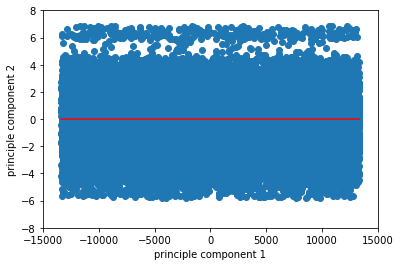

In [12]:
# Add your code here
import matplotlib.pyplot as plt

# given pcs in last cell as a transformation of h1n1 seasonal flu matrix
principle_component_1 = pcs[:,0] # slice 1st component
principle_component_2 = pcs[:,1] # slice 2nd component

plt.scatter(principle_component_1, principle_component_2)
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.xlim(-15000, 15000) # estimated based on various other ranges to see where it starts/ends
plt.ylim(-8, 8)       # estimated based on various other ranges to see where it starts/ends 
m, b = np.polyfit(principle_component_1, principle_component_2, 1)
plt.plot(principle_component_1, m*principle_component_1 + b, '-', color='red')
plt.show()

## Text Data Processing

Download the NY times Dataset from Canvas and save it to the same directory as this Jupyter Notebook.

This file has 3 header lines: Number of Documents, Number of Distinct Words, and Total Number of Words. The following lines represent the documents with three fields:

> docid wordid wordcount

We can read the file with a csv reader:

In [13]:
with open("docword.nips.txt") as csvfile:
    ndocs = int(csvfile.readline())
    nwords = int(csvfile.readline())
    nnz = int(csvfile.readline())
    nips_raw_data = list(csv.reader(csvfile, delimiter=' '))
    
nips_data = [[int(x) for x in y] for y in nips_raw_data] # Convert from string to numeric data

In [14]:
[ndocs, nwords, nnz]

[1500, 12419, 746316]

Now we're going to create an array 'counts' containing the counts for each word over all documents. Note that we use 'row[1] - 1' as the index. The docword files use 1-based array indexing, but Python uses zero-based indexing:

In [15]:
counts = [0] * nwords
for row in nips_data:
    counts[row[1]-1] += row[2] # increment the count for this word by the value in the third column

Next we zip the word index as the first column, and sort this table by word count in descending order.

In [16]:
import operator
wordtab = list(zip(range(nwords), counts))
wordtab.sort(key=lambda x: x[1], reverse=True)

The top (first) values in this list are the most frequent word ids (first column), and their counts (second column):

In [17]:
wordtab[0:8]

[(7357, 25977),
 (7010, 18665),
 (6119, 16075),
 (4269, 14704),
 (5398, 13993),
 (7364, 12667),
 (10002, 11677),
 (315, 11250)]

Now grab the vocabulary file for nips from Canvas and save it to the same directory as this Jupyter Notebook.
Run the following to load it and create a dictionary (word -> wordid) and inverse dictionary (wordid -> word) from it:

In [18]:
mydict = {}            # Word dictionary
words = [''] * nwords  # Invese dictionary - just an array of strings
i = 0
with open("vocab.nips.txt") as txtfile:
    for line in txtfile:
        word = line.rstrip('\n')
        mydict[word] = i
        words[i] = word
        i += 1

Now we can find the top words using the inverse dictionary:

In [19]:
topwords = [words[x] for x,y in wordtab[0:10]]
topwords

['network',
 'model',
 'learning',
 'function',
 'input',
 'neural',
 'set',
 'algorithm',
 'system',
 'data']

<b>Question 17)</b> Based on the results above, What do you think is the topic of the NIPS dataset? <b>[5 Points]</b> 

<b>Answer</b>: It seems that based on the top words output, I could be wrong, however, I believe it may have to do with learning systems, manipulating data, and trying to understand models and neural networks.

Finally, we can plot the counts words in rank order (decreasing order of frequency).

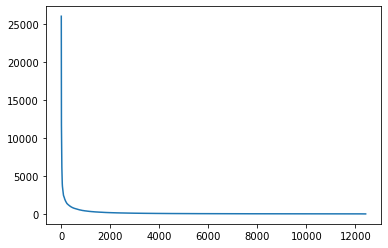

In [20]:
scounts = [y for x,y in wordtab]
plt.plot(scounts)
plt.show()

<b>Question 18)</b> What form does this curve have?. To make it clearer, lets do a log-log plot. <b>[2 Points]</b>

<b>Answer:</b>

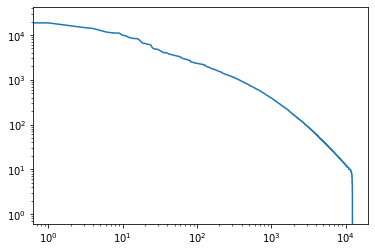

In [21]:
plt.loglog(scounts)
plt.show()